## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

[*********************100%***********************]  1 of 1 completed


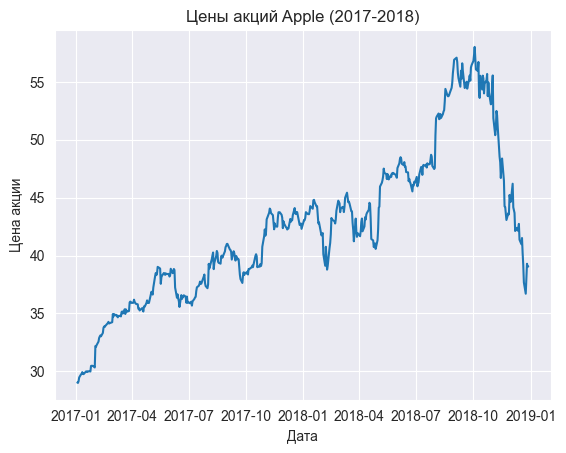

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

# Загрузка данных о ценах акций Apple
start_date = '2017-01-01'
end_date = '2018-12-31'
df = yf.download('AAPL', start=start_date, end=end_date)

# Визуализация временного ряда
plt.plot(df.index, df['Close'])
plt.xlabel('Дата')
plt.ylabel('Цена акции')
plt.title('Цены акций Apple (2017-2018)')
plt.show()


2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

[*********************100%***********************]  1 of 1 completed


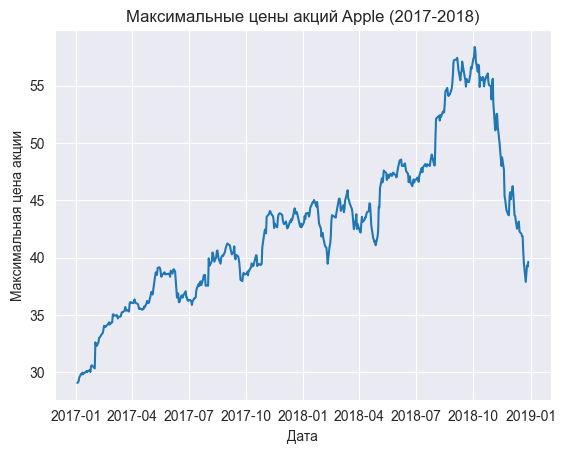

Выбросов не обнаружено.


In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

# Загрузка данных о ценах акций Apple
start_date = '2017-01-01'
end_date = '2018-12-31'
df = yf.download('AAPL', start=start_date, end=end_date)

# Визуализация временного ряда максимальных цен акций
plt.plot(df.index, df['High'])
plt.xlabel('Дата')
plt.ylabel('Максимальная цена акции')
plt.title('Максимальные цены акций Apple (2017-2018)')
plt.show()

# Анализ выбросов
q1 = df['High'].quantile(0.25)
q3 = df['High'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['High'] < lower_bound) | (df['High'] > upper_bound)]['High']
if len(outliers) > 0:
    print("Обнаружены выбросы:")
    print(outliers)
else:
    print("Выбросов не обнаружено.")


## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


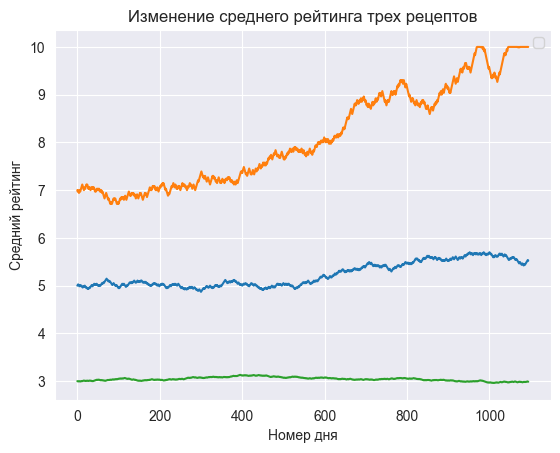

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из файла
data = np.load('average_ratings.npy')
data_df = pd.DataFrame(data=data.transpose(),
                       columns=['waffle iron french toast',
                                'zwetschgenkuchen bavarian plum cake',
                                'lime tea'])

# Построение графика
plt.plot(data_df)
# Настройка подписей осей и заголовка
plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга трех рецептов')

# Добавление легенды
plt.legend()

# Отображение графика
plt.show()


2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


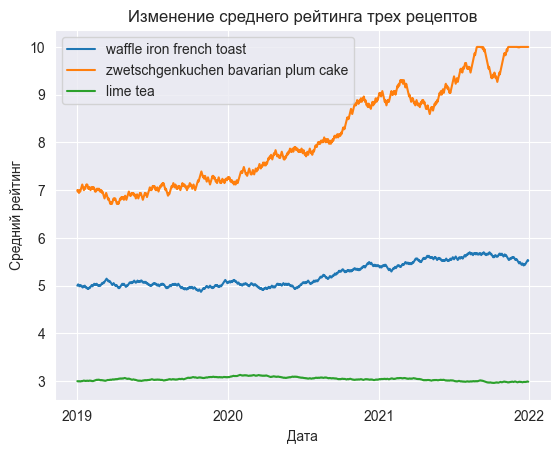

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Загрузка данных из файла
data = np.load('average_ratings.npy')
data_df = pd.DataFrame(data=data.transpose(), columns=['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea'])

# Создание диапазона дат
start_date = '2019-01-01'
end_date = '2021-12-30'
dates = pd.date_range(start_date, end_date, freq='D')
data_df.index = pd.to_datetime(dates)

# Построение графика
fig, ax = plt.subplots()
ax.plot(data_df)

# Настройка подписей осей и заголовка
ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')

# Добавление легенды
ax.legend(['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea'])

# Настройка масштаба осей и засечек
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Отображение графика
plt.show()


3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятaся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2.

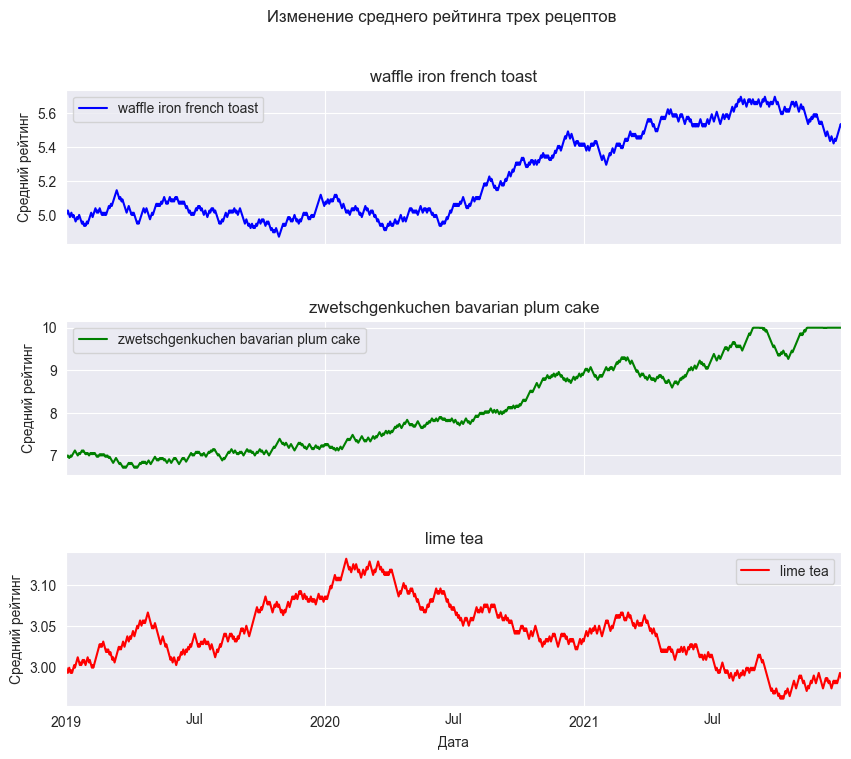

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Загрузка данных из файла
data = np.load('average_ratings.npy')
data_df = pd.DataFrame(data=data.transpose(), columns=['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea'])

# Создание диапазона дат
start_date = '2019-01-01'
end_date = '2021-12-30'
dates = pd.date_range(start_date, end_date, freq='D')
data_df.index = pd.to_datetime(dates)

# Создание 3 графиков
fig, axs = plt.subplots(nrows=3, sharex=True, figsize=(10, 8))

# Построение графиков для каждого рецепта
data_df['waffle iron french toast'].plot(ax=axs[0], color='b')
axs[0].set_title('waffle iron french toast')
axs[0].set_ylabel('Средний рейтинг')
axs[0].legend()

data_df['zwetschgenkuchen bavarian plum cake'].plot(ax=axs[1], color='g')
axs[1].set_title('zwetschgenkuchen bavarian plum cake')
axs[1].set_ylabel('Средний рейтинг')
axs[1].legend()

data_df['lime tea'].plot(ax=axs[2], color='r')
axs[2].set_title('lime tea')
axs[2].set_ylabel('Средний рейтинг')
axs[2].legend()

# Настройка подписей осей и заголовка
fig.suptitle('Изменение среднего рейтинга трех рецептов')
axs[-1].set_xlabel('Дата')

# Настройка масштаба осей и засечек
axs[-1].xaxis.set_major_locator(mdates.YearLocator())
axs[-1].xaxis.set_minor_locator(mdates.MonthLocator())
axs[-1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Настройка отступов между графиками
plt.subplots_adjust(hspace=0.5)

# Отображение графиков
plt.show()


4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


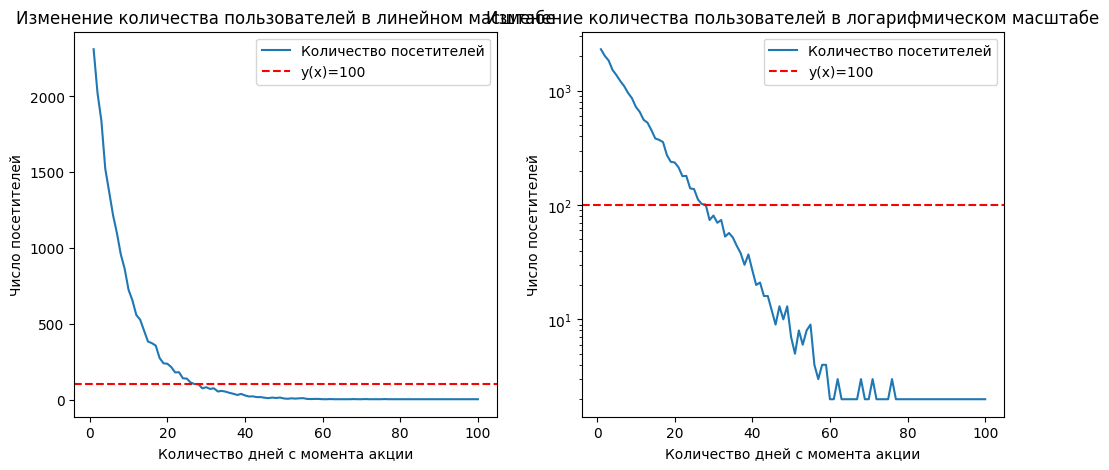

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
visitors = np.load('visitors.npy')

# Создание диапазона дней
days = np.arange(1, 101)

# Создание фигуры и двух графиков на одной строке
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

# Построение графика с линейным масштабом
axs[0].plot(days, visitors, label='Количество посетителей')
axs[0].axhline(y=100, color='red', linestyle='--', label='y(x)=100')
axs[0].set_xlabel('Количество дней с момента акции')
axs[0].set_ylabel('Число посетителей')
axs[0].set_title('Изменение количества пользователей в линейном масштабе')
axs[0].legend()

# Построение графика с логарифмическим масштабом
axs[1].semilogy(days, visitors, label='Количество посетителей')
axs[1].axhline(y=100, color='red', linestyle='--', label='y(x)=100')
axs[1].set_xlabel('Количество дней с момента акции')
axs[1].set_ylabel('Число посетителей')
axs[1].set_title('Изменение количества пользователей в логарифмическом масштабе')
axs[1].legend()

# Вывод графика на экран
plt.show()


## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

    Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [ ]:
# import pandas as pd
# recipes_df =
# reviews_df =

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

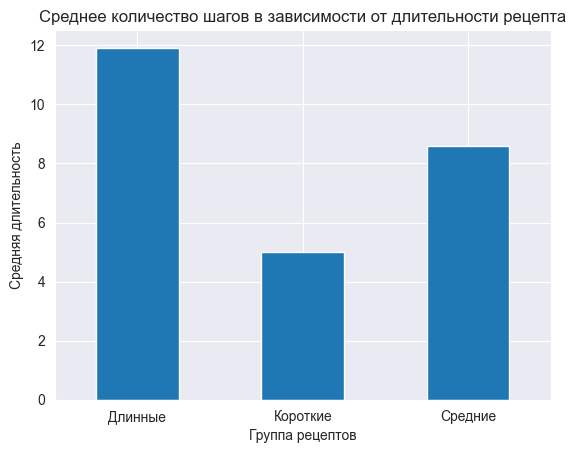

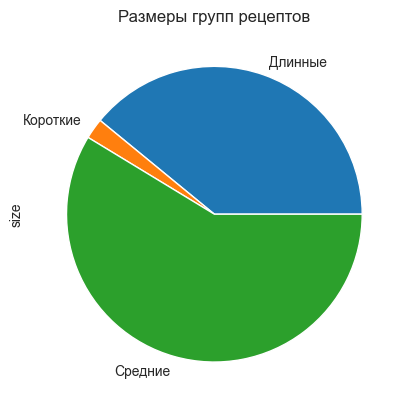

In [10]:
import pandas as pd

# Загрузка данных
recipes = pd.read_csv('recipes_sample.csv')
reviews = pd.read_csv('reviews_sample.csv')

# Определение длительности рецептов в минутах
recipes['duration'] = pd.to_numeric(recipes['minutes'], errors='coerce')
recipes.loc[recipes['duration'] < 5, 'duration_group'] = 'Короткие'
recipes.loc[(recipes['duration'] >= 5) & (recipes['duration'] < 50), 'duration_group'] = 'Средние'
recipes.loc[recipes['duration'] >= 50, 'duration_group'] = 'Длинные'

# Расчет среднего количества шагов и размера каждой группы
grouped_recipes = recipes.groupby('duration_group').agg({'n_steps': 'mean', 'duration_group': 'size'})
grouped_recipes.rename(columns={'duration_group': 'size'}, inplace=True)

# Построение столбчатой диаграммы
ax = grouped_recipes.plot(kind='bar', y='n_steps', legend=False, rot=0)
ax.set_xlabel('Группа рецептов')
ax.set_ylabel('Средняя длительность')
ax.set_title('Среднее количество шагов в зависимости от длительности рецепта')

# Отображение графика
plt.show()

# Построение круговой диаграммы
grouped_recipes['size'].plot(kind='pie', legend=False)
plt.title('Размеры групп рецептов')

# Отображение графика
plt.show()


6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

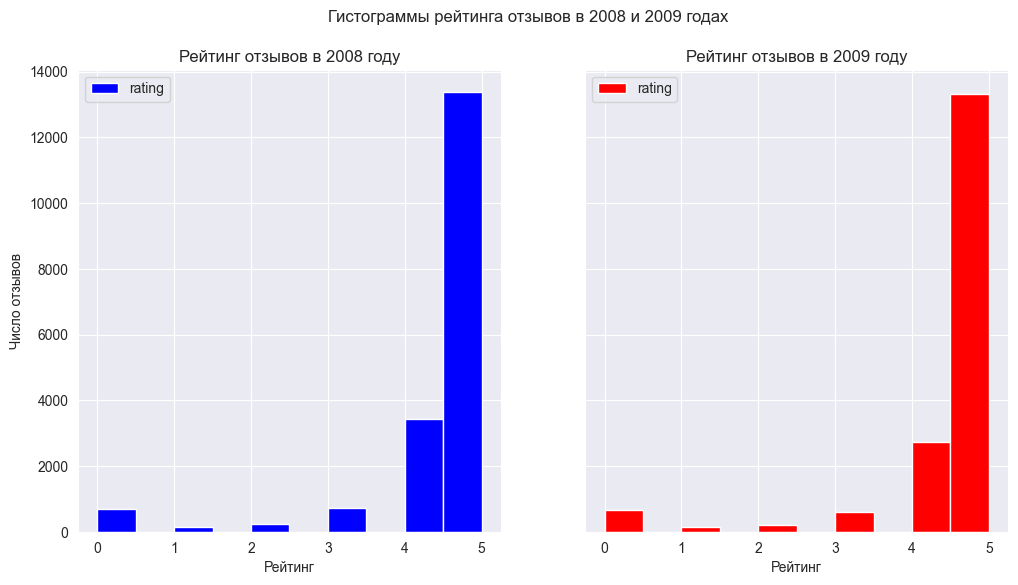

In [11]:
import pandas as pd

# Загрузка данных
recipes = pd.read_csv('recipes_sample.csv')
reviews = pd.read_csv('reviews_sample.csv')

# Оставляем только отзывы за 2008-2009 годы
reviews = reviews[pd.to_datetime(reviews['date']).dt.year.isin([2008, 2009])]

# Создание 2-х гистограмм рейтингов для 2008 и 2009 годов
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

reviews[reviews['date'].str.contains('2008')].plot.hist(y='rating', bins=10, ax=axs[0], color='blue')
axs[0].set_title('Рейтинг отзывов в 2008 году')
axs[0].set_xlabel('Рейтинг')
axs[0].set_ylabel('Число отзывов')

reviews[reviews['date'].str.contains('2009')].plot.hist(y='rating', bins=10, ax=axs[1], color='red')
axs[1].set_title('Рейтинг отзывов в 2009 году')
axs[1].set_xlabel('Рейтинг')

# Добавление общего заголовка
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')

# Отображение графиков
plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

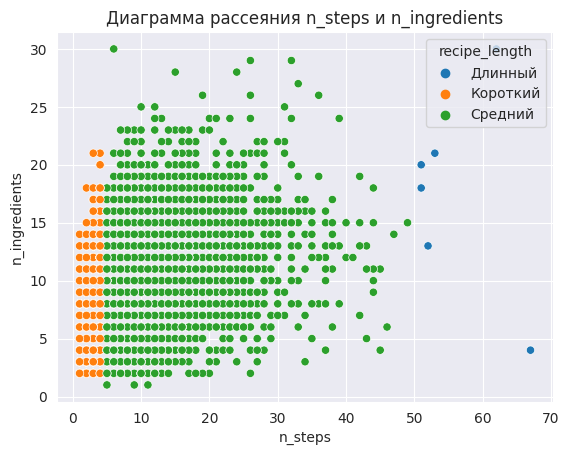

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
recipes = pd.read_csv('recipes_sample.csv')

# Определение длительности рецепта
def recipe_length(x):
    if x < 5:
        return 'Короткий'
    elif x < 50:
        return 'Средний'
    else:
        return 'Длинный'

recipes['recipe_length'] = recipes['n_steps'].apply(recipe_length)

# Построение диаграммы рассеяния
sns.scatterplot(x='n_steps', y='n_ingredients', hue='recipe_length', data=recipes)
plt.title('Диаграмма рассеяния n_steps и n_ingredients')
plt.show()


8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

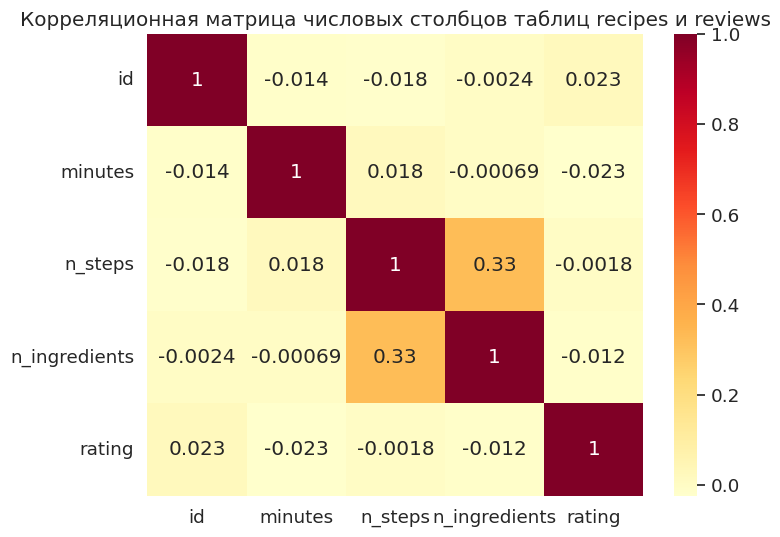

In [13]:
# изменение типа индекса в таблице reviews
reviews.set_index('recipe_id', inplace=True)

# объединение таблиц
data = pd.merge(recipes[['id', 'minutes', 'n_steps', 'n_ingredients']],
                reviews[['rating']], left_on='id', right_index=True)

# построение корреляционной матрицы
corr_matrix = data.corr()

# построение тепловой карты
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')
plt.show()
